<a href="https://colab.research.google.com/github/avinashnarra11/Tensor_flow/blob/main/Classification_Using_Tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:461: FutureWarning: Passing (type, 1) or 

In [2]:
df = pd.read_csv('/pima-indians-diabetes.csv')

In [3]:
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
df.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
df[cols_to_norm]=df[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max()-x.min()))

In [7]:
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


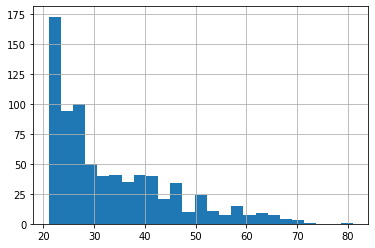

In [8]:
df['Age'].hist(bins=25)

In [9]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
bmi = tf.feature_column.numeric_column('BMI')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [10]:
assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [16]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [17]:
feat_cols = [num_preg,plasma_gluc,dias_press,bmi,tricep, insulin, diabetes_pedigree, age_bucket]

Train_test Split

In [18]:
x_data = df.drop('Class', axis=1)

In [19]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [20]:
labels = df['Class']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split( x_data, labels, test_size=0.3, random_state=101)

In [23]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [24]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp4aagwqac', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [25]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp4aagwqac/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 424.175
INFO:tensorflow:loss = 5.3796344, step = 101 (0.242 sec)
INFO:tensorflow:global_step/sec: 445.682
INFO:tensorflow:loss = 6.188963, step = 201 (0.226 sec)
INFO:tensorflow:global_step/sec: 342.223
INFO:tensorflow:loss = 5.8515887, step = 301 (0.286 sec)
INFO:tensorflow:global_step/sec: 370.449
INFO:tensorflow:loss = 6.5953264, step = 401 (0.271 sec)
INFO:tensorflow:global_step/sec: 388.886
INFO:tensorflow:loss = 5.371883, step = 501 (0.258 sec)
INFO:tensorflow:global_step/sec: 372.501
INFO:tensorflow:loss = 4.191637, step = 601 (0.273 sec)
INFO:tensorflow:global_step/sec: 368.277
INFO:tensorflow:loss = 5.6623993, step = 701 (0.266 sec)
INFO:tensorflow:global_step/sec: 335.353
INFO:tensorflow:loss = 6.6606236, step = 801 (0.298 sec)
INFO:tensorflow:global_step/sec: 390.134
INFO:tensorflow:l

In [26]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x= X_test, y= y_test, batch_size=10, num_epochs=1, shuffle=False)

In [27]:
model.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Starting evaluation at 2021-01-29-19:04:21
INFO:tensorflow:Restoring parameters from /tmp/tmp4aagwqac/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2021-01-29-19:04:21
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73593074, accuracy_baseline = 0.64935064, auc = 0.7968313, auc_precision_recall = 0.64669347, average_loss = 0.5265023, global_step = 1000, label/mean = 0.35064936, loss = 5.067585, prediction/mean = 0.34929478


{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7968313,
 'auc_precision_recall': 0.64669347,
 'average_loss': 0.5265023,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.067585,
 'prediction/mean': 0.34929478}

In [28]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1, shuffle=False)

In [43]:
results = model.predict(input_fn= pred_input_func)

In [44]:
results = list(results)

INFO:tensorflow:Restoring parameters from /tmp/tmp4aagwqac/model.ckpt-1000


In [46]:
results[:20]

[{'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.4955111], dtype=float32),
  'logits': array([-0.01795602], dtype=float32),
  'probabilities': array([0.5044889 , 0.49551114], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6086237], dtype=float32),
  'logits': array([0.4415306], dtype=float32),
  'probabilities': array([0.39137632, 0.6086237 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.37374052], dtype=float32),
  'logits': array([-0.51620305], dtype=float32),
  'probabilities': array([0.6262595 , 0.37374052], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.28833526], dtype=float32),
  'logits': array([-0.90348303], dtype=float32),
  'probabilities': array([0.71166474, 0.28833526], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=

DNN Classifier

In [32]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpwmd42gu8', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [33]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpwmd42gu8/model.ckpt.
INFO:tensorflow:loss = 7.1171036, step = 1
INFO:tensorflow:global_step/sec: 414.307
INFO:tensorflow:loss = 5.7135425, step = 101 (0.248 sec)
INFO:tensorflow:global_step/sec: 398.149
INFO:tensorflow:loss = 5.720928, step = 201 (0.247 sec)
INFO:tensorflow:global_step/sec: 449.497
INFO:tensorflow:loss = 3.7131052, step = 301 (0.221 sec)
INFO:tensorflow:global_step/sec: 379.162
INFO:tensorflow:loss = 4.6290455, step = 401 (0.265 sec)
INFO:tensorflow:global_step/sec: 414.637
INFO:tensorflow:loss = 3.4341428, step = 501 (0.241 sec)
INFO:tensorflow:global_step/sec: 396.767
INFO:tensorflow:loss = 4.6665707, step = 601 (0.250 sec)
INFO:tensorflow:global_step/sec: 383.048
INFO:tensorflow:loss = 3.5992398, step = 701 (0.264 sec)
INFO:tensorflow:global_step/sec: 352.738
INFO:tensorflow:loss = 4.9273868, step = 801 (0.282 sec)
INFO:tensorflow:global_step/sec: 396.28
INFO:tensorflow

In [34]:
eval_dnn_model = dnn_model.evaluate(input_fn= eval_input_func)

INFO:tensorflow:Starting evaluation at 2021-01-29-19:16:54
INFO:tensorflow:Restoring parameters from /tmp/tmpwmd42gu8/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2021-01-29-19:16:55
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7619048, accuracy_baseline = 0.64935064, auc = 0.8295473, auc_precision_recall = 0.7017663, average_loss = 0.48878902, global_step = 1000, label/mean = 0.35064936, loss = 4.704594, prediction/mean = 0.38724056


In [35]:
eval_dnn_model

{'accuracy': 0.7619048,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8295473,
 'auc_precision_recall': 0.7017663,
 'average_loss': 0.48878902,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.704594,
 'prediction/mean': 0.38724056}

In [48]:
predictions = dnn_model.predict(input_fn= pred_input_func)

In [49]:
predictions = list(predictions)
predictions[:20]

INFO:tensorflow:Restoring parameters from /tmp/tmpwmd42gu8/model.ckpt-1000


[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5282613], dtype=float32),
  'logits': array([0.11316574], dtype=float32),
  'probabilities': array([0.47173873, 0.5282613 ], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.80332786], dtype=float32),
  'logits': array([1.4072245], dtype=float32),
  'probabilities': array([0.1966722 , 0.80332786], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.34369552], dtype=float32),
  'logits': array([-0.6468687], dtype=float32),
  'probabilities': array([0.6563045, 0.3436955], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.30612347], dtype=float32),
  'logits': array([-0.8183055], dtype=float32),
  'probabilities': array([0.69387656, 0.3061235 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=obje